In [79]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from scipy.stats import norm
import math
from sklearn.metrics import mean_absolute_error
import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly

import yfinance as yf

#pesos para uso das empresas
pesos = np.array([0.04579877, 0.10065911, 0.05203524, 0.07009186, 0.09986174,
         0.05894185, 0.01878224, 0.02098791, 0.01420743, 0.01101616,
         0.01289593, 0.06706893, 0.09493909, 0.01703658,
        0.02083494, 0.02857037, 0.0379588 , 0.01738156, 0.06394153,
       0.01380989000000001 , 0.13318007])  


/tmp/ipykernel_4737/2925564671.py:4: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



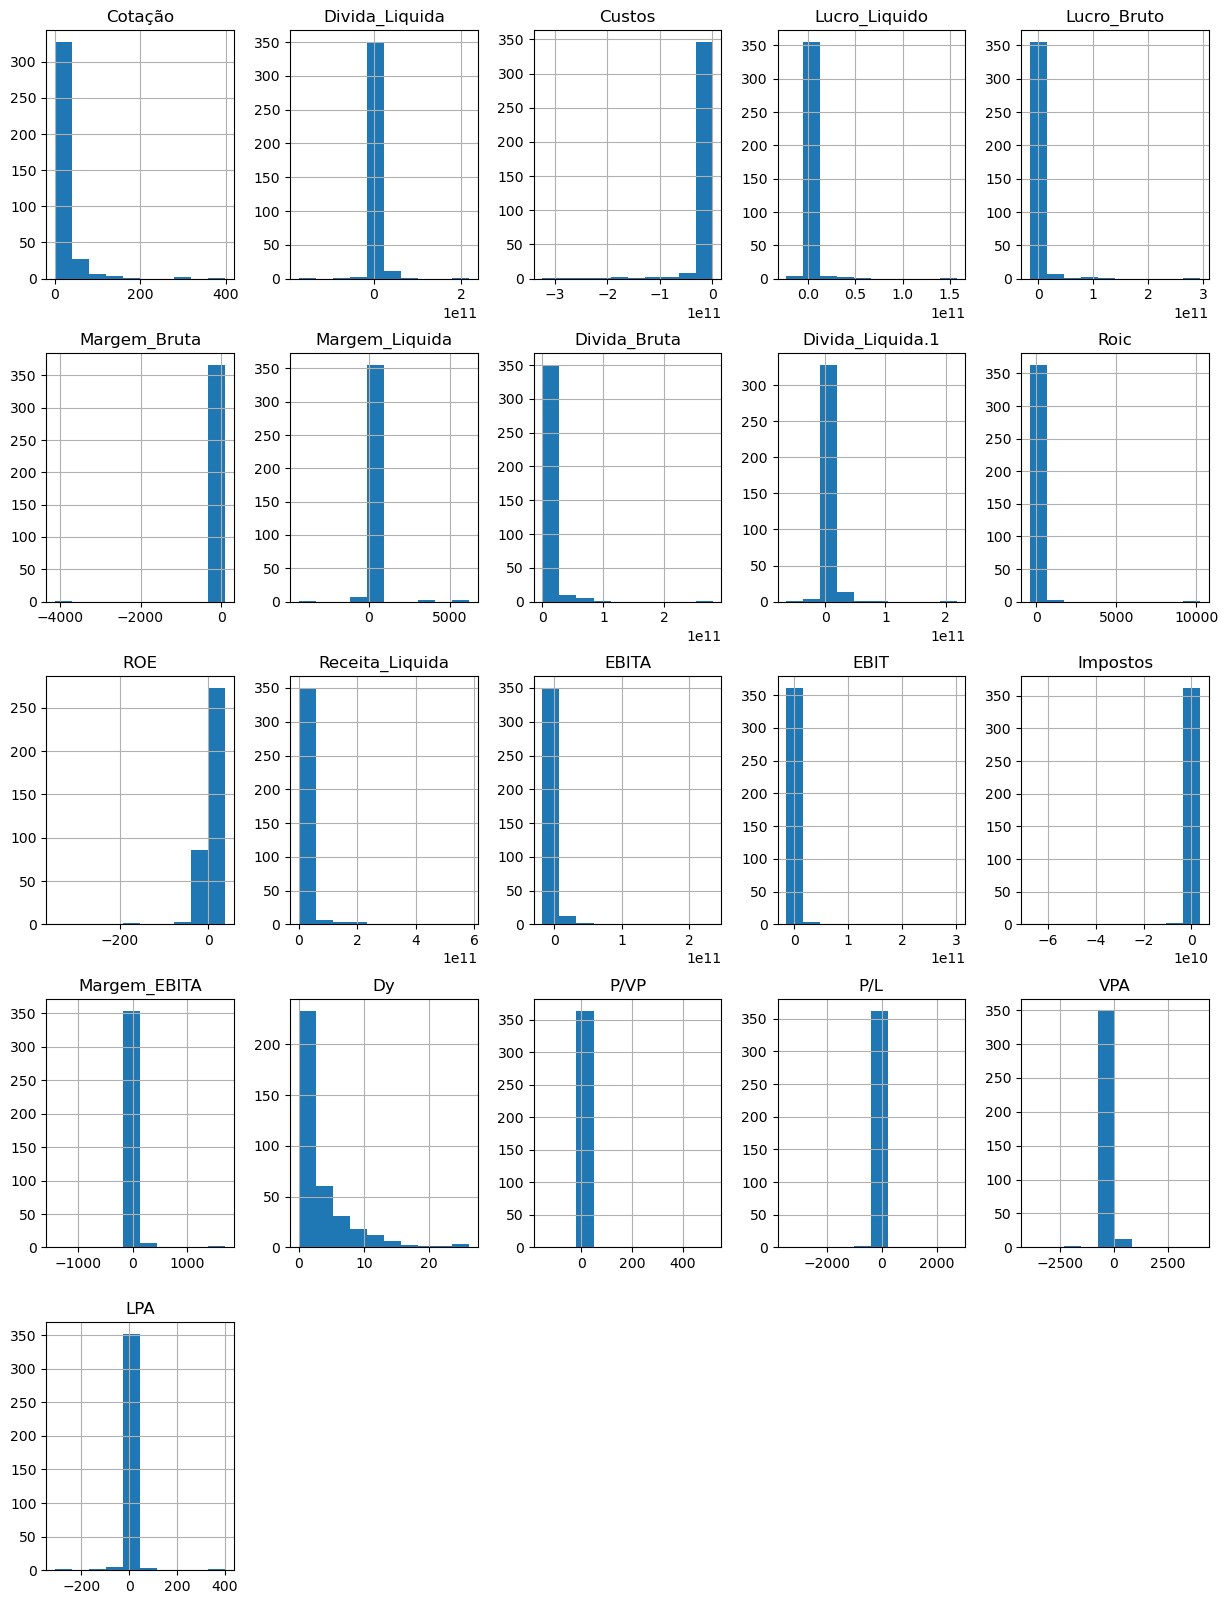

In [64]:
dataset = pd.read_csv("data.csv", sep=";", encoding="utf-8")
figura = plt.figure(figsize=(15,20))
eixo = figura.gca()
dataset.hist(ax = eixo);

In [66]:
dinheiro_total = 5000
taxa_selic_2010 = 12.5
taxa_selic_2011 = 9.25
taxa_selic_2012 = 7.25
taxa_selic_2013 = 7.75
taxa_selic_2014 = 9.5
taxa_selic_2015 = 14.25
taxa_selic_2016 = 14.25
taxa_selic_2017 = 14.25
taxa_selic_2018 = 6.5
taxa_selic_2019 = 5.25
taxa_selic_2020 = 2.25
taxa_selic_2021 = 7.75
taxa_selic_2022 = 11.75
taxa_selic_2023 = 12.5

valor_2010 = dinheiro_total + (dinheiro_total * taxa_selic_2010 / 100)
valor_2011 = valor_2010 + (dinheiro_total * taxa_selic_2011 / 100)
valor_2012 = valor_2011 + (dinheiro_total * taxa_selic_2012 / 100)
valor_2013 = valor_2012 + (dinheiro_total * taxa_selic_2013 / 100)
valor_2014 = valor_2013 + (dinheiro_total * taxa_selic_2014 / 100)
valor_2015 = valor_2014 + (dinheiro_total * taxa_selic_2015 / 100)
valor_2016 = valor_2015 + (dinheiro_total * taxa_selic_2016 / 100)
valor_2017 = valor_2016 + (dinheiro_total * taxa_selic_2017 / 100)
valor_2018 = valor_2017 + (dinheiro_total * taxa_selic_2018 / 100)
valor_2019 = valor_2018 + (dinheiro_total * taxa_selic_2019 / 100)
valor_2020 = valor_2019 + (dinheiro_total * taxa_selic_2020 / 100)
valor_2021 = valor_2020 + (dinheiro_total * taxa_selic_2021 / 100)
valor_2022 = valor_2021 + (dinheiro_total * taxa_selic_2022 / 100)
valor_2023 = valor_2022 + (dinheiro_total * taxa_selic_2023 / 100)
valor_2023
taxa_selic_historico = np.array([taxa_selic_2010, taxa_selic_2011, taxa_selic_2012, taxa_selic_2013, taxa_selic_2014, taxa_selic_2015, taxa_selic_2016, taxa_selic_2017, taxa_selic_2018, taxa_selic_2019, taxa_selic_2020, taxa_selic_2021, taxa_selic_2022, taxa_selic_2023])
dataset_original = dataset.copy()
dinheiro_total = 5000
sem_risco = taxa_selic_historico.mean() / 100
rf = sem_risco


In [67]:
## Calculo CAPM
dataset = pd.read_csv('acoes.csv')
dataset.drop(labels = ['Date'], axis = 1, inplace = True)
dataset_normalizado = dataset.copy()
for i in dataset.columns:
  dataset_normalizado[i] = dataset[i] / dataset[i][0]

dataset_taxa_retorno = (dataset_normalizado / dataset_normalizado.shift(1)) - 1
dataset_taxa_retorno.fillna(0, inplace=True)  

betas = []
alphas = []
rm = dataset_taxa_retorno['BOVA11.SA'].mean() * 246
for ativo in dataset_taxa_retorno.columns[0:-1]:
   beta, alpha = np.polyfit(dataset_taxa_retorno['BOVA11.SA'], dataset_taxa_retorno[ativo], 1)
   betas.append(beta)
   alphas.append(alpha)

def visualiza_betas_alphas(betas, alphas):
  for i, ativo in enumerate(dataset_taxa_retorno.columns[0:-1]):
    #print(i, ativo)
    print(ativo, 'beta:', betas[i], 'alpha:', alphas[i] * 100)   
def visualiza_capm(capm):
  for i, ativo in enumerate(dataset_taxa_retorno.columns[0:-1]):
    print(ativo, 'CAPM:', capm[i] * 100)    

np.array(alphas).mean() * 100

capm_empresas = []
for i, ativo in enumerate(dataset_taxa_retorno.columns[0:-1]):
  capm_empresas.append(rf + (betas[i] * (rm - rf)))


capm_portfolio = np.sum(capm_empresas * pesos) * 100

#visualiza_betas_alphas(betas, alphas)  
#print()  
#visualiza_capm(capm_empresas)
print(f"O CAPM do portifolio é: {round(capm_portfolio,2)} ")

O CAPM do portifolio é: 8.13 


In [77]:
## Monte Carlo

# dataset = pd.read_csv("acoes.csv")
# figura = px.line(title = 'Histórico do preço das ações')
# for i in dataset.columns[1:]:
#   figura.add_scatter(x = dataset['Date'], y = dataset[i], name = i)
# figura.show()
empresa = input("Escreva o nome da empresa")
simulacoes = int(input("Qntd Simulações"))
dias_frente = int(input("Quantos dias a frente?"))
dataset = pd.read_csv('acoes.csv')
dataset = pd.DataFrame(dataset[f"{empresa}"])
dataset_normalizado = dataset.copy()
for i in dataset:
  dataset_normalizado[i] = dataset[i] / dataset[i][0]
dataset_taxa_retorno = np.log(1 + dataset_normalizado.ffill().pct_change())
dataset_taxa_retorno.fillna(0, inplace=True)
# dataset_taxa_retorno

media = dataset_taxa_retorno.mean() 
variancia = dataset_taxa_retorno.var()
drift = media - (0.5 * variancia)
# drift

desvio_padrao = dataset_taxa_retorno.std()
desvio_padrao
Z = norm.ppf(np.random.rand(dias_frente, simulacoes))

retornos_diarios = np.exp(drift.values + desvio_padrao.values * Z)
previsoes = np.zeros_like(retornos_diarios)
previsoes[0] = dataset.iloc[-1] # escolhe o ultimo valor

for dia in range(1, dias_frente):
  #print(dia)
  previsoes[dia] = previsoes[dia - 1] * retornos_diarios[dia]

figura = px.line(title = 'Previsões do preço das ações - simulações')
for i in range(len(previsoes.T)):
  figura.add_scatter(y = previsoes.T[i], name = i)

#figura.show()  

dataset_empresa = yf.download(f"{empresa}", start='2023-10-12')['Close']
dataset_empresa.to_csv('empresa.csv')
dataset_empresa = pd.read_csv('empresa.csv')
dataset_empresa
simulacao1 = previsoes.T[0][0:len(dataset_empresa)]
print(len(simulacao1), len(dataset_empresa))
np.sum(abs(simulacao1 - dataset_empresa['Close'])) / len(simulacao1)

erros = []

for i in range(len(previsoes.T)):
  simulacao = previsoes.T[i][0:len(dataset_empresa)]
  erros.append(mean_absolute_error(dataset_empresa['Close'], simulacao))

result = [(num, idx) for idx, num in enumerate(erros) if num < 1]
print(result)  



[*********************100%%**********************]  1 of 1 completed
15 15
[(0.9854632818154054, 837), (0.9665317076979733, 2995), (0.9735356143703436, 3256), (0.9966834291171182, 4222)]


In [78]:
figura = px.line(title = 'Previsões do preço das ações - simulação')
figura.add_scatter(y = dataset_empresa['Close'], name = f'Valor {empresa}')
figura.add_scatter(y = previsoes.T[837], name = 'Melhor simulação')


In [81]:
### SERIES TEMPORAIS 

dataset = pd.read_csv('acoes.csv')
data_kepp = pd.DataFrame()


dinheiro = 5000
data_kepp["Date"] = dataset["Date"] 
data_kepp["BOVA11.SA"] = dataset["BOVA11.SA"]


dataset.drop("Date", inplace= True, axis= 1)
dataset.drop("BOVA11.SA", inplace= True, axis= 1)

for i in dataset.columns:
            dataset[i] = (dataset[i] / dataset[i][0])

for i, acao in enumerate(dataset.columns):
            dataset[acao] = dataset[acao] * pesos[i] * dinheiro

dataset['soma carteira'] = dataset[1:].sum(axis = 1)

dataset["Date"] = data_kepp["Date"]
dataset["BOVA11.SA"] = data_kepp["BOVA11.SA"]

dataset = dataset[['Date', 'soma carteira']].rename(columns = {'Date': 'ds', 'soma carteira': 'y'})
modelo = Prophet()
modelo.fit(dataset)
futuro = modelo.make_future_dataframe(periods=90)
previsoes = modelo.predict(futuro)
plot_plotly(modelo, previsoes)

14:26:15 - cmdstanpy - INFO - Chain [1] start processing
14:26:15 - cmdstanpy - INFO - Chain [1] done processing
/home/ikaro/anaconda3/lib/python3.11/site-packages/_plotly_utils/basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



<Axes: >

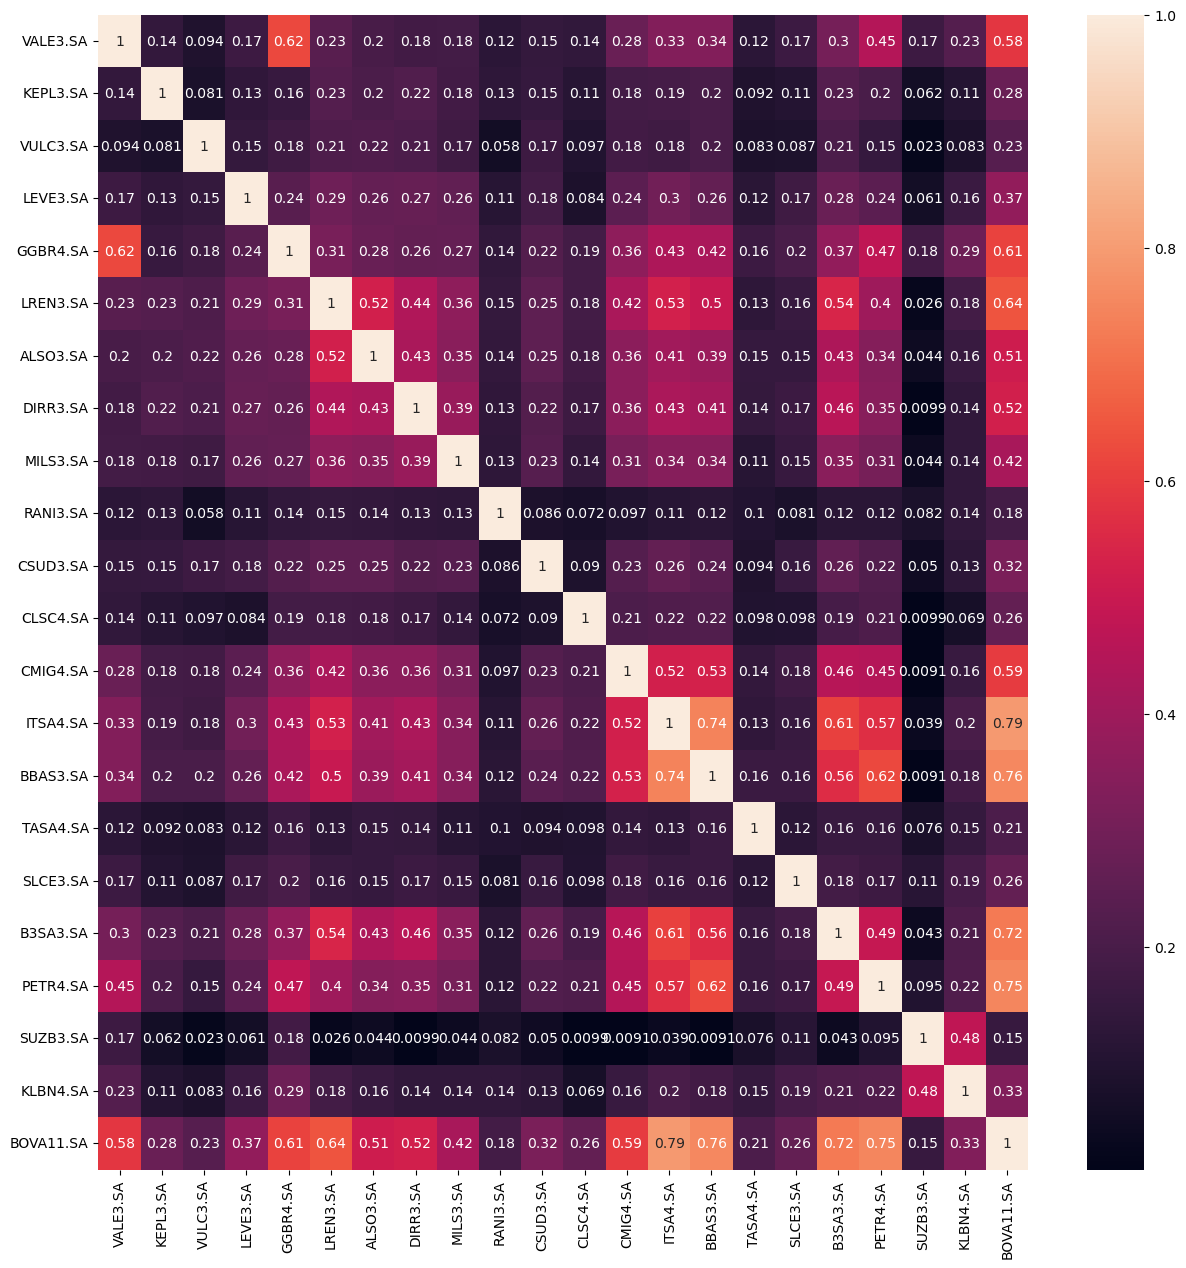

In [82]:
#correlação empresas
dataset = pd.read_csv("acoes.csv")
dataset.drop(labels= ['Date'], axis=1, inplace=True)
taxas_retorno = (dataset/ dataset.shift(1) - 1)
taxas_retorno
plt.figure(figsize=(15,15))
sns.heatmap(taxas_retorno.corr(), annot=True)

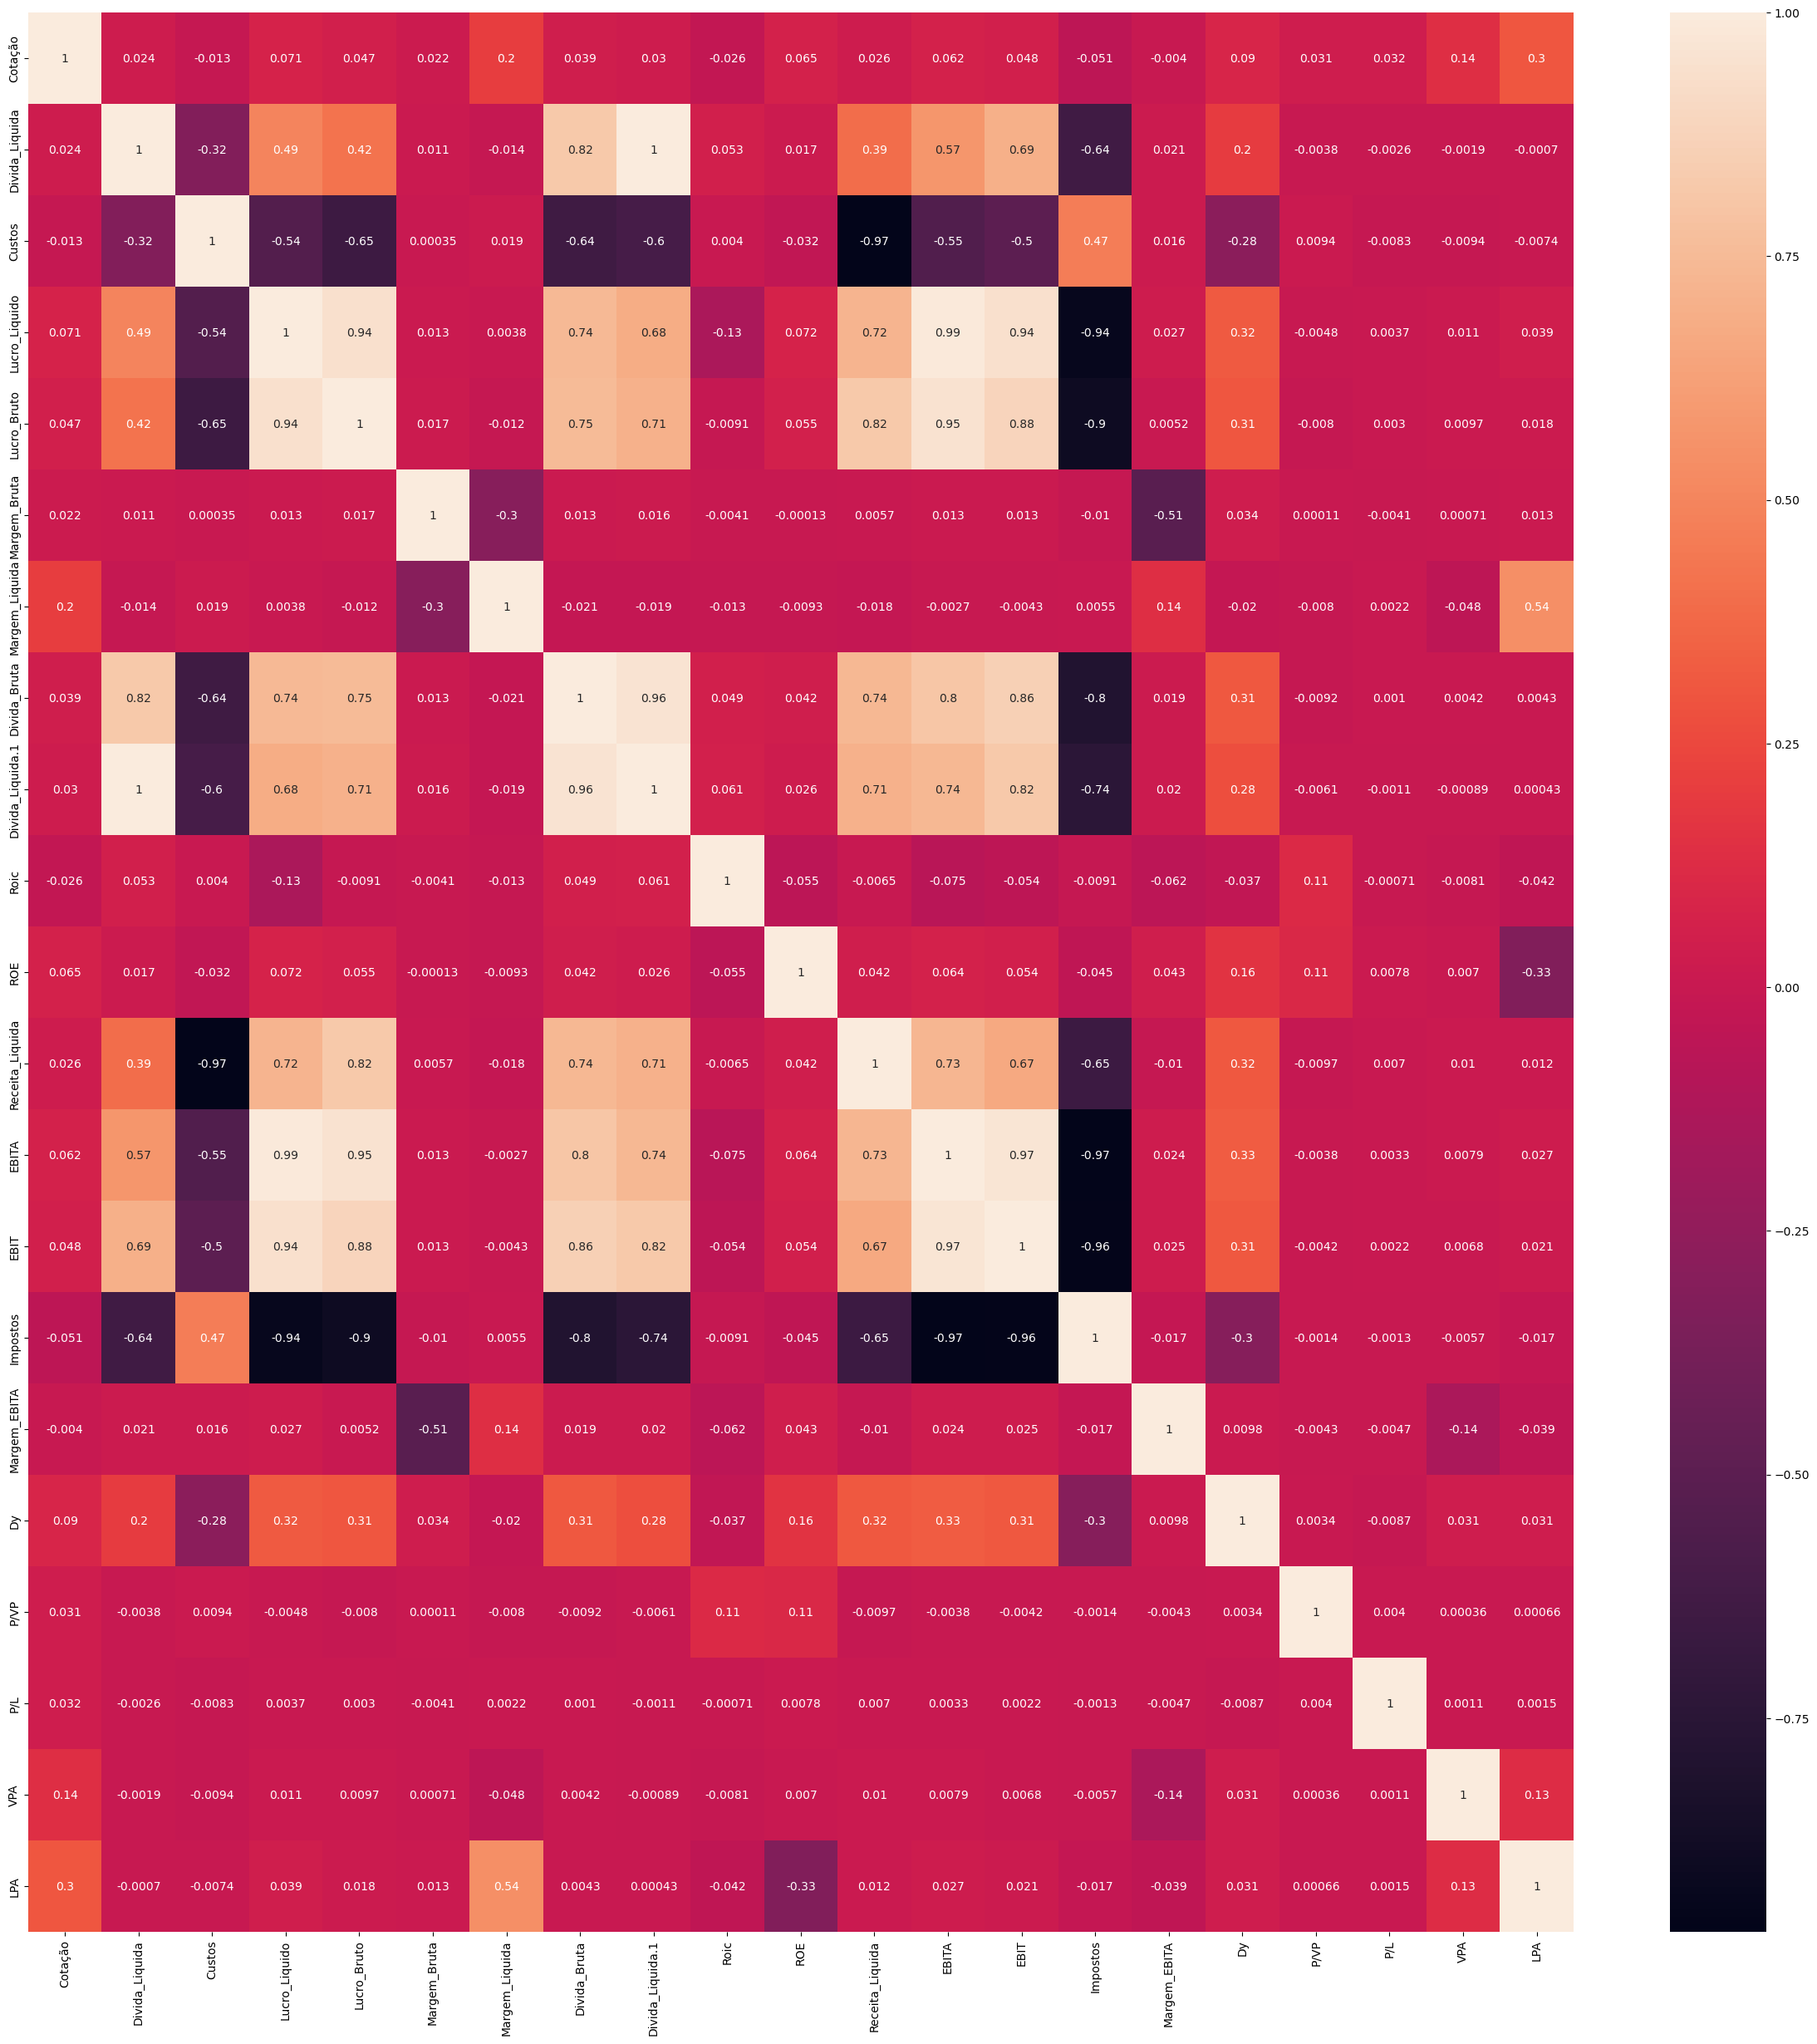

In [84]:
#correlação indicadores
dataset = pd.read_csv("data.csv", sep=";", encoding="utf-8")
try:
    dataset.drop(columns = ["Empresa"], inplace= True)
except Exception as e:
    pass

finally:
    plt.figure(figsize=(30,30))
    sns.heatmap(dataset.corr(), annot=True);